In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from track import get_infected_img
from track import get_activations_at_h
import sys
from math import ceil
from pathlib import Path
import numpy as np
sys.path.insert(0, '..') # in order to be able to import from scripts.py
from scripts.client import VisAVisClient
from scripts.make_protocol import make_protocol

In [17]:
PARAMETERS_DEFAULT = {
  "c_rate": 1,
  "e_incr": 1,
  "i_incr": 1,
  "r_incr": 0.0667
}

In [18]:
folder = "results/pulses"
Path(folder).mkdir(parents=True, exist_ok=True)
intervals = [50, 100, 150, 200, 250, 300]
signal_count = 250
sim_num = 4

In [19]:
def signal_to_intervals(signal, interval):
    intervals = []
    count = 1
    for num in signal:
        if num == 1:
            intervals.append(count)
            count = 1
        else:
            count += 1
    intervals = np.array(intervals) * interval
    return intervals

signal = np.random.choice([0, 1], size=(signal_count,))

In [ ]:
for channel_height in [7]:

    client = VisAVisClient(
        visavis_bin=f'../target/bins/vis-a-vis-{channel_height}',
    )

    for interval in intervals:

        protocol_file_path = make_protocol(
            pulse_intervals = (signal_count - 1) * [interval] + [800],
            duration=4,
            out_folder='./'
        )

        for sim in range(sim_num):
            result = client.run(
            parameters_json=PARAMETERS_DEFAULT,
            protocol_file_path= protocol_file_path,
            )
            img = get_infected_img(result.states)
            activations = get_activations_at_h(img, -1)
            activations.to_csv(f"{folder}/out-{interval}-{sim}.csv")

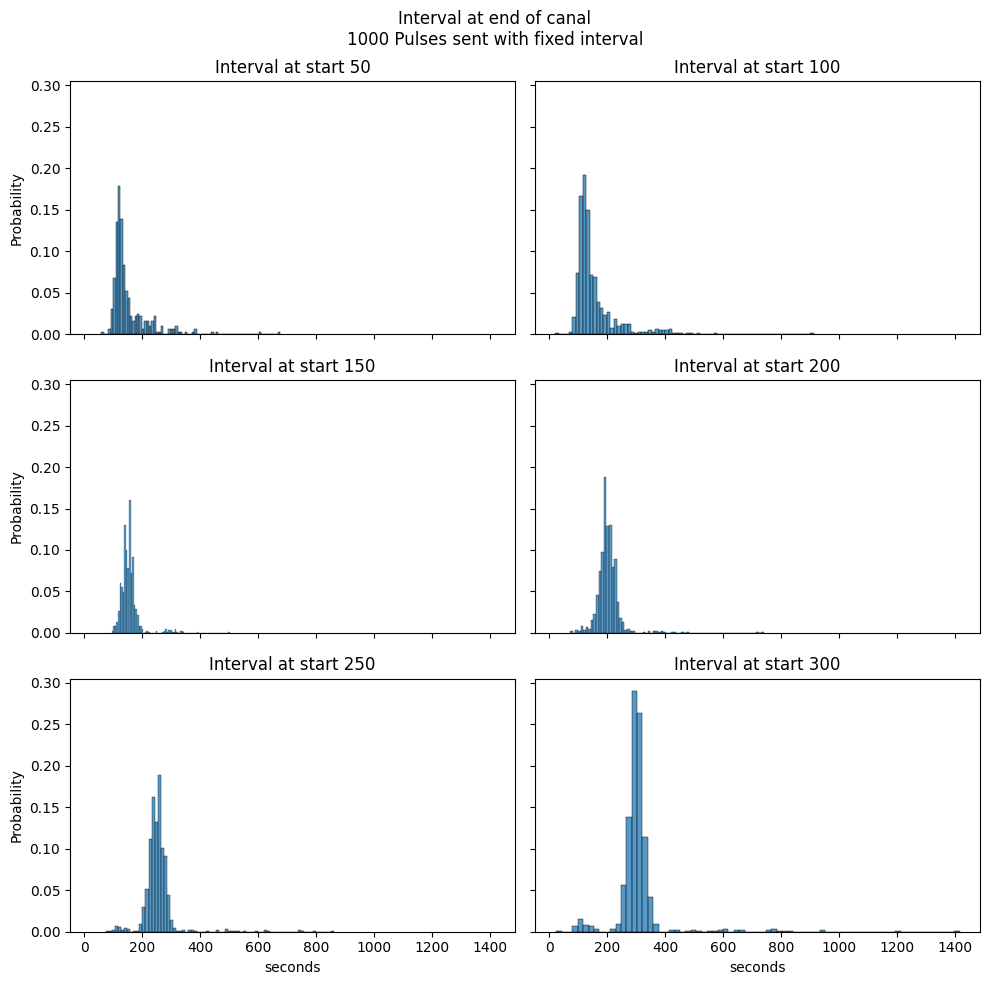

In [26]:
import seaborn as sns 

fig, axes = plt.subplots(3, 2, figsize = (10,10) ,sharex=True, sharey=True)
fig.suptitle('Interval at end of canal\n1000 Pulses sent with fixed interval') # or plt.suptitle('Main title')
for i, interval in enumerate(intervals):
        activations = pd.concat(
                [pd.read_csv(f"{folder}/out-{interval}-{i}.csv")['seconds'].diff() for i in range(sim_num)]
                )
        sns.histplot(activations, bins = 75, stat='probability', ax = axes[i//2][i%2])
        axes[i//2][i%2].set_title(f"Interval at start {interval}")
plt.tight_layout()
